<a href="https://colab.research.google.com/github/unknown-jun/Basic_of_Python/blob/master/07_Dev_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import random

In [ ]:
from google.colab import files
files = files.upload()

Saving emp3.csv to emp3.csv


# 지난주의 복습

1. 파이썬의 자료형 5가지
2. 파이썬 연산자
3. if문
4. loop문
5. 문자열에서 특정 위치의 철자 검색, 슬라이싱 검색
6. 파이썬으로 함수 생성하기
7. 파이썬으로 class 생성하기
8. 파이썬의 예외처리
9. 판다스 사용법

- 클래스를 왜 사용하는지?
(객체 지향 언어의 장점이 무엇인지?)
> 상속을 사용할 수 있기 때문에

- 상속을 사용했을 때의 장점은?
> 부모 클래스가 작성한 기능(메소드)을 코딩하지 않아도 됨  
중요한 기능은 부모 클래스를 작성하는 팀장님이 구현하고 팀원은 그 중요기능을 그대로 상속받고 팀장님이 시킨 상세코드에 집중할수 있기 때문


# 판다스로 조인 복습
- 판다스로 조인(join)을 하기 위해서는 merge를 사용하면 가능
~~~
문법: pandas.merger( emp, dept, how = 'inner', on = 'deptno' )  
옵션:   
***how ='inner'**:  emp와 dept 데이터프레임에 공통적으로 존재하는 교집합일 경우에만 추출하겠다.  
***how = 'outer'**:  열의 데이터가 양쪽 데이터 프레임에 공통적으로 존재하는 교집합이 아니어도 추출하겠다.  
***how = 'left'**:  왼쪽 데이터 프레임의 키열에 속하는 데이터 값을 기준으로 병합하겠다.  
***how = 'right'**:  오른쪽 데이터 프레임의 키열에 속하는 데이터 값을 기준으로 병합하겠다.

In [ ]:
from google.colab import files
files = files.upload()

Saving dept3.csv to dept3.csv


```
> SQL
select e.ename, d.loc
    from emp e, dept d
    where e.deptno = d.deptno
```

In [ ]:
emp = pd.read_csv('emp3.csv')
dept = pd.read_csv('dept3.csv')
result = pd.merge( emp, dept, on = 'deptno', how = 'left')
result[['ename', 'loc']]

,ename,loc
0,KING,NEW YORK
1,BLAKE,CHICAGO
2,CLARK,NEW YORK
3,JONES,DALLAS
4,MARTIN,CHICAGO
5,ALLEN,CHICAGO
6,TURNER,CHICAGO
7,JAMES,CHICAGO
8,WARD,CHICAGO
9,FORD,DALLAS


**문제 221. 부서번호, 부서번호 별 평균 월급을 출력하시오**
~~~
SQL>
select deptno, avg(sal)
    from emp
    group by deptno
~~~

In [ ]:
result =  emp.groupby('deptno')['sal'].mean().reset_index()
result
"""
groupby 후에 reset_index()를 쓰지 않으면 Series 타입이기에 수정하기가 번거로움
groupby 부터 시작해서 reset_index()를 한 세트로 외워 항상 같이 사용하자
"""

,deptno,sal
0,10,2916.666667
1,20,2175.000000
2,30,1566.666667


**문제 222. 위의 결와에서 평균월급을 출력할 때 정수부분만 출력해라 (소수점 이전까지만 출력)**

In [ ]:
result = emp.groupby('deptno')['sal'].mean().reset_index().astype(int)
result
# astype(int)는 출력되는 데이터에서 정수형으로 변환해라 라는 뜻

,deptno,sal
0,10,2916
1,20,2175
2,30,1566


**문제 223. 직업과 직업별 토탈월급을 출력하시오**
~~~
select job, sum( sal )
    from emp
    group by job;
~~~


In [ ]:
result = emp.groupby('job')['sal'].sum().reset_index()
result

,job,sal
0,ANALYST,6000
1,CLERK,4150
2,MANAGER,8275
3,PRESIDENT,5000
4,SALESMAN,5600


**문제 224. 부서위치, 부서위치별 토탈월급을 출력하시오**
```
select d.loc, sum( e.sal )
    from emp e, dept d
    where d.deptno = e.deptno;
```

In [ ]:
result = pd.merge( emp, dept, on='deptno')
sum_sal = result.groupby('loc')['sal'].sum().reset_index()
sum_sal

,loc,sal
0,CHICAGO,9400
1,DALLAS,10875
2,NEW YORK,8750


**문제 225. 아래의 SQL을 판다스로 구현하시오**
~~~
SQL>
select d.loc, nvl( sum( e.sal ), 0 )
    from emp e, dept d
    where d.deptno = e.deptno
    group by d.loc;
~~~

In [ ]:
result = pd.merge( emp, dept, how='right', on='deptno')
sum_sal = result.groupby('loc')['sal'].sum().reset_index()
sum_sal

,loc,sal
0,BOSTON,0.0
1,CHICAGO,9400.0
2,DALLAS,10875.0
3,NEW YORK,8750.0


**문제 226. 아래의 SQL을 판다스로 구현하시오**
~~~
SQL>
select deptno, count(*)
    from emp
    group by deptno;
~~~

In [ ]:
merge_table = pd.merge( emp, dept, on='deptno')
count_dept = merge_table.groupby('deptno')['empno'].count().reset_index()
count_dept
# 판다스에선 *이 없기 때문에 Null 값이 없는 컬럼인 empno로 맞춤

,deptno,empno
0,10,3
1,20,5
2,30,6


**문제 227. emp122.csv를 내려받아 판다스 데이터 프레임으로 만드시오**

In [ ]:
from google.colab import files
file = files.upload()

Saving emp122.csv to emp122.csv


In [ ]:
emp12 = pd.read_csv('emp122.csv')

**문제 228. 통신사, 통신사별 인원수를 출력하시오**

In [ ]:
result = emp12.groupby('TELECOM')['INDEX'].count().reset_index()
result

,TELECOM,INDEX
0,kt,15
1,lg,4
2,sk,11


**문제 229. 우리반 테이블에서 통신사가 KT이고 나이가 30살 이상인 학생들의 이름과 나이와 통신사를 출력하시오!**

In [ ]:
search = emp12[['ENAME', 'AGE', 'TELECOM']][ (emp12['TELECOM'] == 'kt') & (emp12['AGE'] >= 30) ]
"""
and는 판다스에서 &이고 or은 판다스에서 |
그리고 &, |를 사용할 때는 양족 조건에 소괄호를 둘러줘야함
"""
search

,ENAME,AGE,TELECOM
1,한결,31,kt


#68. 반올림수 구하기(round)
- 파이썬 내장함수 round()는 인자로 입력된 숫자형 자리수에서 반올림한 결과를 리턴함


In [ ]:
# 예제
print( round(16.554) )     # 소수점 첫번째 자리에서 반올림
print( round(16.554, 0) )  # 소수점 첫번째 자리에서 반올림(하지만 float)
print( round(16.554, 1) )  # 소수점 두번째 자리에서 반올림 (16.6)
print( round(16.554, 2) )  # 소수점 세번째 자리에서 반올림 (16.55)

17
17.0
16.6
16.55


- 파이썬에서 반올림할 때 중요하게 알아야 할 내용

In [ ]:
round(142.5) # 143으로 예상이 되는데 142가 나옴

142

"R과 파이썬은 짝수를 선호함"  
142.5 ---> 142  
187.5 ---> 188  
  
파이썬은 기본적으로 이것을 해결하는 함수가 없음  
0.5일때 짝수를 좋아하게끔 반올림되고 0.51일 때는 그냥 반올림

```
# 예제 판다스를 이용하지 않고 파이썬으로만 emp3.csv에서 이름과 월급을 출력하시오
import csv

file = open("/Users/LeeJunhyeok/Downloads/emp2.csv")  # os에 있는 emp2.csv 읽어서 file 이라는 변수에 넣는다.
emp_csv = csv.reader(file)   # file 변수에 있는 csv 파일을 읽어서 emp_csv 변수에 넣는다.
print( emp_csv )             # 이 상테에서 그냥 프린트 하면 메모리가 주소만 나옴

for emp_list in emp_csv:
    print(emp_list[1], emp_list[5])
```

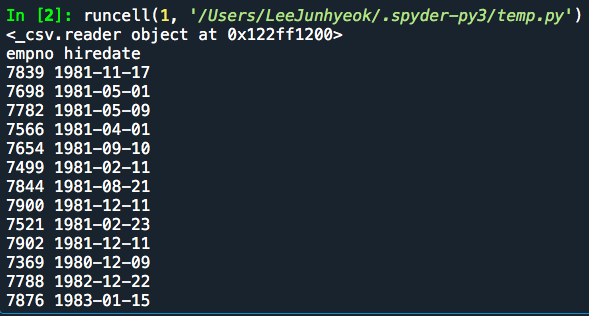

**문제 230. 판다스를 이용하지 말고 이름과 월급 X 12.3를 출력하시오**

~~~
import csv

file = open("/Users/LeeJunhyeok/Downloads/emp2.csv")  # os에 있는 emp2.csv 읽어서 file 이라는 변수에 넣는다.
emp_csv = csv.reader(file)   # file 변수에 있는 csv 파일을 읽어서 emp_csv 변수에 넣는다.
print( emp_csv )             # 이 상테에서 그냥 프린트 하면 메모리가 주소만 나옴

for emp_list in emp_csv:
    print(emp_list[1], int(emp_list[5])*12.3)
~~~

**문제 231. 위의 문제에서 월급을 반올림 하시오**
```
import csv

file = open("/Users/LeeJunhyeok/Downloads/emp2.csv")  # os에 있는 emp2.csv 읽어서 file 이라는 변수에 넣는다.
emp_csv = csv.reader(file)   # file 변수에 있는 csv 파일을 읽어서 emp_csv 변수에 넣는다.
print( emp_csv )             # 이 상테에서 그냥 프린트 하면 메모리가 주소만 나옴

for emp_list in emp_csv:
    print(emp_list[1], round( int(emp_list[5])*12.3) )
```
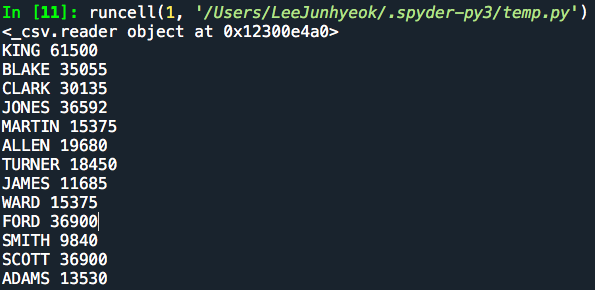

**문제 232. 직업이 SALESMAN인 사원들의 이름과 직업을 출력하는데 판다스를 이용하지 말고 emp2.csv를 읽어서 출력하시오**
```
import csv

file = open("/Users/LeeJunhyeok/Downloads/emp2.csv")  
emp_csv = csv.reader(file) 
for emp_list in emp_csv:
    if emp_list[2]=='SALESMAN':
        print(emp_list[1],emp_list[2] )
```
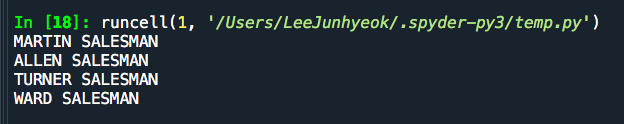

**문제 233. 부서번호가 20번인 사원들의 이름과 월급과 부서번호를 출력하시오**  
판다스를 이용한 방법과 이용하지 않고 하는 방법 모두로 출력하시오

~~~
import csv

file = open("/Users/LeeJunhyeok/Downloads/emp2.csv")  
emp_csv = csv.reader(file) 
for emp_list in emp_csv:
    if int(emp_list[7])== 20:
        print(emp_list[1],emp_list[3], emp_list[7] )
~~~
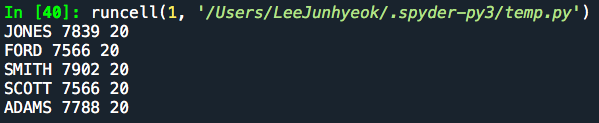

In [ ]:
emp[['ename', 'sal', 'deptno']][emp['deptno']==20]

,ename,sal,deptno
3,JONES,2975,20
9,FORD,3000,20
10,SMITH,800,20
11,SCOTT,3000,20
12,ADAMS,1100,20


#69. 실수형 자료를 정수형 자료로 변환하기(int)
- 파이썬의 변환함수 정리

| | 데이터유형|변환함수|
|:--:|:--:|:--:|
|정수형|int|int()|
|문자형|str| tr()|
|실수형|float|float()|
|리스트형|list|list()|
|튜플형|tuple|tuple()|

- 코드 작성시 수학 연산을 하다보면 정수끼리만 계산해야 하는 경우가 있음
> 이때 우리가 가진 데이터가 실수형이라면 실수형 자료를 정수형으로 변환한 뒤 계산을 해줘야 함
- 파이썬 내장함수 int()는 인자로 입력된 실수형 자료를 정수형 자료로 변환해줌
- int()는 입력된 실수형 자료의 소수부분은 버리고 정수부분만 취하여 정수값으로 리턴함

In [ ]:
print( int(-5.4) )

-5


**문제 234. 판다스를 이용하여 emp3.csv를 읽어 이름과 월급을 출력하는데 월급을 출력할 때 소수점 이하는 버리고 정수부분만 출력하게 하시오**

In [ ]:
emp[['ename', 'sal']]

,ename,sal
0,KING,5000
1,BLAKE,2850
2,CLARK,2450
3,JONES,2975
4,MARTIN,1250
5,ALLEN,1600
6,TURNER,1500
7,JAMES,950
8,WARD,1250
9,FORD,3000


#70. 정수형 자료를 실수형 자료로 변환하기(float)
- 이미지 처리나 공학용 프로그램을 작성할 때 실수형 끼리만 계산해야 하는 경우가 많음
- 이때 우리가 가진 데이터가 정수형이라면 실수형 자료로 변환한 후에 계산해 주어야 함
- 파이썬 내장함수 float()은 인자로 입력된 정수형 자료를 실수형으로 변환해 줌

In [ ]:
print( float(10) )

10.0


In [ ]:
emp['sal']=emp['sal'].apply(float)
emp['sal']

0     5000.0
1     2850.0
2     2450.0
3     2975.0
4     1250.0
5     1600.0
6     1500.0
7      950.0
8     1250.0
9     3000.0
10     800.0
11    3000.0
12    1100.0
13    1300.0
Name: sal, dtype: float64

**문제 235. 판다스를 이용해서 이름과 월급을 출력하는데 월급을 출력할 때 실수형으로 출력하시오**

In [ ]:
emp['sal']=emp['sal'].apply(float)  # emp 데이터 프레임의 sal 컬럼의 데이터를 float로 변환함
emp[['ename','sal']]

,ename,sal
0,KING,5000.0
1,BLAKE,2850.0
2,CLARK,2450.0
3,JONES,2975.0
4,MARTIN,1250.0
5,ALLEN,1600.0
6,TURNER,1500.0
7,JAMES,950.0
8,WARD,1250.0
9,FORD,3000.0


- emp['sal'].apply는 emp 데이터 프레임에서 sal 시리즈에 apply 함수를 적용해서 데이터 유형을 변경할 수 있음
- emp['sal'].apply(float) 이렇게 하면 데이터 유형을 실수형으로 변경하라는 것임

#71. 정수 리스트에서 소수만 걸러내기 (filter)
- 파이썬 내장함수인 filter()는 리스트와 같은 자료형에서 특정 조건을 만족하는 값만 편리하게 추출할 수 있는 방법을 제공함
- filter()의 첫번째 인자는 특정 조건의 값을 추출하는 함수가 입력되며 두번째( 입력매개변수 ) 리스트와 같은 자료형이 입력됩니다.

In [ ]:
# 예제 숫자가 나열되어 있는 리스트에서 짝수만 추출해내는 코드를 작성
a = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
# 숫자를 입력하여 짝수면 결과를 출력하고 홀수면 출력하지 않는 함수를 생성

def get_even(num):
    if num%2 == 0:
        return num
    else:
        return    # 리턴 다음에 아무것도 쓰지 않아서 아무것도 리턴되지 않음

print( get_even(2) )
print( get_even(5) )

2
None


In [ ]:
# filter함수와 get_even 함수를 이용해서 위의 a 리스트에서 짝수를 추출하기
a = [1,2,3,4,5,6,7,8,9,10]
result = filter( get_even,a )
            # ( 함수이름, 리스트 이름 )
print( result )   # <filter object at 0x7f7b7c940048>
print( list(result) )  # 리스트로 변환해야 결과가 출력됨

[2, 4, 6, 8, 10]


**문제 236. 아래의 리스트에서 숫자가 300 이상이면 출력하고 300 미만이면 출력되지 않게 하시오**


In [ ]:
b = [100, 352, 254, 456, 123, 234, 567, 903]

def over_300(num):
    if num >= 300:
        return num
    else:
        return

result = filter( over_300, b )
list(result)

[352, 456, 567, 903]

**문제 237. 우리반 데이터에서 나이가 30살 이상인 나이만 따로 결과 리스트로 출력하시오**

In [ ]:
over_30 =[]
for i in emp12['AGE']:
    if i >= 30:
        over_30.append(i)

print( over_300 )

<function over_300 at 0x7f7b7ca198c8>


#72. 최대값, 최소값 구하기(max, min)
- max()와 min()은 인자로 입력된 자료에서 최대, 최소값을 구해주는 함수.
- max()와 min()의 인자로 리스트와 같은 시퀀스 자료가 입력되면 시퀀스 자료의 요소 가운데 최대값 또는 최소값을 리턴함

|오라클|파이썬|
|:--:|:--:|
|min|min|
|max|max|
|count|len|
|sum|sum|
|avg|mean|


In [ ]:
# 예제
a = [8, 7, 12, 55, 21, 34, 15, 9, 22]
max(a)

55

**문제 238. 사원 테이블에서 최대 월급을 출력하시오(emp3.csv)**
1. 판다스를 이용했을 때
2. 판다스를 이용하지 않았을때
```
import csv
file = open("/Users/LeeJunhyeok/Downloads/emp2.csv") 
emp_csv = csv.reader(file)
emp_list = []
for i in emp_csv:
    emp_list.append(int(i[5]))



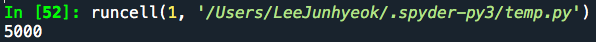
```

In [ ]:
emp[['sal']].max()

sal    5000.0
dtype: float64

**문제 239. 우리반 데이터에서 최소나이를 출력하시오**
1. 판다스를 이용했을때
2. 판다스를 이용하지 않았을때

In [ ]:
emp12[['AGE']].min()

AGE    24
dtype: int64

In [ ]:
emp12

,INDEX,ENAME,AGE,GENDER,MAJOR,TELECOM,EMAIL,ADDRESS,TELECOM_PRICE
0,1,이준혁,29,남,경영학과,kt,3461419@naver.com,경기도 안양시 동안구 호개동,17000
1,2,한결,31,남,경제학과,kt,gksruf90@naver.com,경기도 광주시 곤지암읍 삼리,17000
2,3,현지연,35,여,관광경영학과,sk,hyunjy86@naver.com,경기도 안산시 상록구 본삼로,18500
3,4,성기창,29,남,경영학과,sk,goboy2005@gmail.com,서울시 양천구 목5동,18500
4,5,유혜영,28,여,응용통계학과,sk,jjku0519@naver.com,경기도 안산시 단원구 고잔동,18500
5,6,김정민,28,남,메카트로닉스과,lg,rlawjdals113@naver.com,경기도 시흥시 은행동,18000
6,7,이성원,25,남,통계학과,kt,pumadd1227@gmail.com,경기도 성남시 수정구 고등동,17000
7,8,김정원,28,여,수학통계학과,kt,jungwkim415@gmail.com,경기도 성남시 분당구 정자동,17000
8,9,김미승,27,여,금융학과,lg,miseung.hailey@gmail.com,경기도 용인시 수지구 성복동,18000
9,10,김예린,27,여,컨벤션경영학과,kt,marykim1205@naver.com,경기도 성남시 분당구 운중동,17000


#73. 판다스에서 결측치(NaN) 확인하기

- emp3.csv에 comm 처럼 결측치(NaN)을 처리하는 판다스 함수 => **isnull()**

- 데이터를 받았으면 데이터 분석전 데이터 전처리를 해야 함
- 데이터 전처리 중에서 결측치를 확인하는 단계가 있음

In [ ]:
emp[['ename', 'comm']]

,ename,comm
0,KING,NaN
1,BLAKE,NaN
2,CLARK,NaN
3,JONES,NaN
4,MARTIN,1400.0
5,ALLEN,300.0
6,TURNER,0.0
7,JAMES,NaN
8,WARD,500.0
9,FORD,NaN


**문제 240. 커미션이 결측치(NaN)인 사원들의 이름과 커미션을 출력하시오**

In [ ]:
emp[['ename', 'comm']][emp['comm'].isnull()]

,ename,comm
0,KING,NaN
1,BLAKE,NaN
2,CLARK,NaN
3,JONES,NaN
7,JAMES,NaN
9,FORD,NaN
10,SMITH,NaN
11,SCOTT,NaN
12,ADAMS,NaN
13,MILLER,NaN


**문제 241. 커미션이 결측치(NaN)이 아닌 사원들의 이름과 커미션을 출력하시오**

In [ ]:
emp[['ename', 'comm']][~emp['comm'].isnull()]

,ename,comm
4,MARTIN,1400.0
5,ALLEN,300.0
6,TURNER,0.0
8,WARD,500.0


**문제 242. emp3.csv에 결측치가 있는 지 확인하시오**

In [ ]:
emp.isnull()

,index,empno,ename,job,mgr,hiredate,sal,comm,deptno
0,False,False,False,False,True,False,False,True,False
1,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,True,False


**문제 243. emp3.csv에 결측치가 몇개인지 확인하시오**


In [ ]:
emp.isnull().sum()

index        0
empno        0
ename        0
job          0
mgr          1
hiredate     0
sal          0
comm        10
deptno       0
dtype: int64

- **결측치가 있으면 데이터 분석하기가 어렵고 머신러닝을 이용한 데이터 분석인 경우 좋은 머신러닝 모델이 나오기 어렵기 때문에 결측치를 처리를 해줘야 함**

**문제 244. 타이타닉 데이터에 결측치가 어느 컬럼에 많은지 확인하시오**

In [ ]:
from google.colab import files
file2 = files.upload()

Saving train.csv to train.csv


In [ ]:
tat = pd.read_csv("train.csv")
tat.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#74. 판다스에서 파생변수 추가하는 방법
- 파생변수란 기존의 데이터를 가지고 새롭게 가공해서 만든 새로운 컬럼


- emp 데이터 프레임에 sal의 데이터와 똑같은 데이터로 sal2라는 컬럼에 추가하시오

In [ ]:
emp['sal2']=emp['sal']   # emp 데이터 프레임에 sal2 컬럼을 추가하는데 데이터는 emp 데이터프레임에 sal로 하시오
emp             

,index,empno,ename,job,mgr,hiredate,sal,comm,deptno,sal2
0,1,7839,KING,PRESIDENT,NaN,1981-11-17 0:00,5000.0,NaN,10,5000.0
1,2,7698,BLAKE,MANAGER,7839.0,1981-05-01 0:00,2850.0,NaN,30,2850.0
2,3,7782,CLARK,MANAGER,7839.0,1981-05-09 0:00,2450.0,NaN,10,2450.0
3,4,7566,JONES,MANAGER,7839.0,1981-04-01 0:00,2975.0,NaN,20,2975.0
4,5,7654,MARTIN,SALESMAN,7698.0,1981-09-10 0:00,1250.0,1400.0,30,1250.0
5,6,7499,ALLEN,SALESMAN,7698.0,1981-02-11 0:00,1600.0,300.0,30,1600.0
6,7,7844,TURNER,SALESMAN,7698.0,1981-08-21 0:00,1500.0,0.0,30,1500.0
7,8,7900,JAMES,CLERK,7698.0,1981-12-11 0:00,950.0,NaN,30,950.0
8,9,7521,WARD,SALESMAN,7698.0,1981-02-23 0:00,1250.0,500.0,30,1250.0
9,10,7902,FORD,ANALYST,7566.0,1981-12-11 0:00,3000.0,NaN,20,3000.0


**문제 245. 판다스를 이용해서 이름과 부서위치를 출력하시오**
(emp3.csv와 dept3.csv)를 이용하시오)

In [ ]:
emp = pd.read_csv("emp3.csv")
dept = pd.read_csv("dept3.csv")

result = pd.merge(emp, dept, how='inner',  on = "deptno")
result[['ename', 'loc']]

,ename,loc
0,KING,NEW YORK
1,CLARK,NEW YORK
2,MILLER,NEW YORK
3,BLAKE,CHICAGO
4,MARTIN,CHICAGO
5,ALLEN,CHICAGO
6,TURNER,CHICAGO
7,JAMES,CHICAGO
8,WARD,CHICAGO
9,JONES,DALLAS


**문제 246. emp 데이터 프레임에 loc 컬럼을 추가하고 해당사원의 부서위치로 값을 갱신하시오**

In [ ]:
emp['loc'] = result['loc'] # emp 데이터프레임에 loc컬럼을 추가하면서 result의 loc로 값을 갱신합니다.
emp

,index,empno,ename,job,mgr,hiredate,sal,comm,deptno,loc
0,1,7839,KING,PRESIDENT,NaN,1981-11-17 0:00,5000,NaN,10,NEW YORK
1,2,7698,BLAKE,MANAGER,7839.0,1981-05-01 0:00,2850,NaN,30,NEW YORK
2,3,7782,CLARK,MANAGER,7839.0,1981-05-09 0:00,2450,NaN,10,NEW YORK
3,4,7566,JONES,MANAGER,7839.0,1981-04-01 0:00,2975,NaN,20,CHICAGO
4,5,7654,MARTIN,SALESMAN,7698.0,1981-09-10 0:00,1250,1400.0,30,CHICAGO
5,6,7499,ALLEN,SALESMAN,7698.0,1981-02-11 0:00,1600,300.0,30,CHICAGO
6,7,7844,TURNER,SALESMAN,7698.0,1981-08-21 0:00,1500,0.0,30,CHICAGO
7,8,7900,JAMES,CLERK,7698.0,1981-12-11 0:00,950,NaN,30,CHICAGO
8,9,7521,WARD,SALESMAN,7698.0,1981-02-23 0:00,1250,500.0,30,CHICAGO
9,10,7902,FORD,ANALYST,7566.0,1981-12-11 0:00,3000,NaN,20,DALLAS


< 파생변수를 추가를 하는 이유 >
- emp 테이블에서 퇴사할 것 같은 사원이 누구인지 예측하시오!
    - 머신러닝을 이용해서 예측을 함
    - 월급이 작은 사람
    - 머신러닝이 예측을 잘하려면 좋은 데이터를 주고 학습시켜야 함
    - 자기의 월급이 자기가 속한 직업의 평균월급보다 더 작은 월급을 받는 사원이면 퇴사할 가능성이 높음
    - 직업별 평균월급이 emp 데이터프레임에 추가되어 있으면 머신러닝이 예측하기 좋은 데이터가 추가가 된것
    

**문제 247. 직업, 직업별 평균월급을 판다스로 출력하시오**

In [ ]:
result = emp.groupby('job')['sal'].mean().reset_index()
result['sal'] = result['sal'].astype(int)   # result 데이터프레임에 sal을 정수형으로 변환하여 result데이터 프레임에 sal에 반영하겠다.
result

,job,sal
0,ANALYST,3000
1,CLERK,1037
2,MANAGER,2758
3,PRESIDENT,5000
4,SALESMAN,1400


**문제 248. emp와 result를 서로 조인해서 조인된 전체 데이터 프레임을 출력하시오**

In [ ]:
"""
emp에도 sal 이 있고 result에도 sal이 있어서 emp의 sal은 컬럼명이 sal_x로 변경되었고 result의 sal은 sal_y로 변경 됨.
sal_y는 해당 직업의 평균월급
"""

merge_job = pd.merge(emp, result, on='job', how='inner' )
merge_job

,index,empno,ename,job,mgr,hiredate,sal_x,comm,deptno,loc,sal_y
0,1,7839,KING,PRESIDENT,NaN,1981-11-17 0:00,5000,NaN,10,NEW YORK,5000
1,2,7698,BLAKE,MANAGER,7839.0,1981-05-01 0:00,2850,NaN,30,NEW YORK,2758
2,3,7782,CLARK,MANAGER,7839.0,1981-05-09 0:00,2450,NaN,10,NEW YORK,2758
3,4,7566,JONES,MANAGER,7839.0,1981-04-01 0:00,2975,NaN,20,CHICAGO,2758
4,5,7654,MARTIN,SALESMAN,7698.0,1981-09-10 0:00,1250,1400.0,30,CHICAGO,1400
5,6,7499,ALLEN,SALESMAN,7698.0,1981-02-11 0:00,1600,300.0,30,CHICAGO,1400
6,7,7844,TURNER,SALESMAN,7698.0,1981-08-21 0:00,1500,0.0,30,CHICAGO,1400
7,9,7521,WARD,SALESMAN,7698.0,1981-02-23 0:00,1250,500.0,30,CHICAGO,1400
8,8,7900,JAMES,CLERK,7698.0,1981-12-11 0:00,950,NaN,30,CHICAGO,1037
9,11,7369,SMITH,CLERK,7902.0,1980-12-09 0:00,800,NaN,20,DALLAS,1037


**문제 249. emp 데이터 프레임에 컬럼을 하나 추가하는데 job_avgsal로 추가하고 문제 248번에서 구한 직업별 평균월급인 result['sal_y']의 값으로 값을 갱신하시오**

In [ ]:
emp['job_avgsal'] = merge_job['sal_y']
emp

,index,empno,ename,job,mgr,hiredate,sal,comm,deptno,loc,job_avgsal
0,1,7839,KING,PRESIDENT,NaN,1981-11-17 0:00,5000,NaN,10,NEW YORK,5000
1,2,7698,BLAKE,MANAGER,7839.0,1981-05-01 0:00,2850,NaN,30,NEW YORK,2758
2,3,7782,CLARK,MANAGER,7839.0,1981-05-09 0:00,2450,NaN,10,NEW YORK,2758
3,4,7566,JONES,MANAGER,7839.0,1981-04-01 0:00,2975,NaN,20,CHICAGO,2758
4,5,7654,MARTIN,SALESMAN,7698.0,1981-09-10 0:00,1250,1400.0,30,CHICAGO,1400
5,6,7499,ALLEN,SALESMAN,7698.0,1981-02-11 0:00,1600,300.0,30,CHICAGO,1400
6,7,7844,TURNER,SALESMAN,7698.0,1981-08-21 0:00,1500,0.0,30,CHICAGO,1400
7,8,7900,JAMES,CLERK,7698.0,1981-12-11 0:00,950,NaN,30,CHICAGO,1400
8,9,7521,WARD,SALESMAN,7698.0,1981-02-23 0:00,1250,500.0,30,CHICAGO,1037
9,10,7902,FORD,ANALYST,7566.0,1981-12-11 0:00,3000,NaN,20,DALLAS,1037


- 현업에서 머신러닝 데이터 분석가들이 하는 일 중 상당수가 바로 이런 파생변수를 추가하는 작업임
- 좋은 파생변수를 추가해야 머신러닝의 예측이 좋은 결과를 얻을 수 있음
- 게임회사에선 그 게임을 탈퇴할 것 같은 유저를 머신러닝으로 찾아 형평성에 어긋나지 않도록 하면서 그 유저가 인식하지 못하도록 혜택을 줌

**문제 250. emp 데이터 프레임에 해당 사원이 근무하는 부서번호의 평균월급을 sal_avg라는 이름으로 파생변수를 생성하시오**

In [ ]:
emp = pd.read_csv("emp3.csv")
result = emp.groupby('deptno')['sal'].mean()
result2 = pd.merge(result, emp, on='deptno')
result2['sal_avg'] = result2['sal_y']
result2

,deptno,sal_x,index,empno,ename,job,mgr,hiredate,sal_y,comm,sal_avg
0,10,2916.666667,1,7839,KING,PRESIDENT,NaN,1981-11-17 0:00,5000,NaN,5000
1,10,2916.666667,3,7782,CLARK,MANAGER,7839.0,1981-05-09 0:00,2450,NaN,2450
2,10,2916.666667,14,7934,MILLER,CLERK,7782.0,1982-01-11 0:00,1300,NaN,1300
3,20,2175.000000,4,7566,JONES,MANAGER,7839.0,1981-04-01 0:00,2975,NaN,2975
4,20,2175.000000,10,7902,FORD,ANALYST,7566.0,1981-12-11 0:00,3000,NaN,3000
5,20,2175.000000,11,7369,SMITH,CLERK,7902.0,1980-12-09 0:00,800,NaN,800
6,20,2175.000000,12,7788,SCOTT,ANALYST,7566.0,1982-12-22 0:00,3000,NaN,3000
7,20,2175.000000,13,7876,ADAMS,CLERK,7788.0,1983-01-15 0:00,1100,NaN,1100
8,30,1566.666667,2,7698,BLAKE,MANAGER,7839.0,1981-05-01 0:00,2850,NaN,2850
9,30,1566.666667,5,7654,MARTIN,SALESMAN,7698.0,1981-09-10 0:00,1250,1400.0,1250


**문제 251. emp 데이터 프레임을 출력하는데 월급이 높은 순서대로 출력하시오**

In [ ]:
emp = pd.read_csv('emp3.csv')
result = emp.sort_values('sal', ascending=False) # 데이터를 정렬하기 위해선 sort_values 함수를 사용함
result

,index,empno,ename,job,mgr,hiredate,sal,comm,deptno
0,1,7839,KING,PRESIDENT,NaN,1981-11-17 0:00,5000,NaN,10
9,10,7902,FORD,ANALYST,7566.0,1981-12-11 0:00,3000,NaN,20
11,12,7788,SCOTT,ANALYST,7566.0,1982-12-22 0:00,3000,NaN,20
3,4,7566,JONES,MANAGER,7839.0,1981-04-01 0:00,2975,NaN,20
1,2,7698,BLAKE,MANAGER,7839.0,1981-05-01 0:00,2850,NaN,30
2,3,7782,CLARK,MANAGER,7839.0,1981-05-09 0:00,2450,NaN,10
5,6,7499,ALLEN,SALESMAN,7698.0,1981-02-11 0:00,1600,300.0,30
6,7,7844,TURNER,SALESMAN,7698.0,1981-08-21 0:00,1500,0.0,30
13,14,7934,MILLER,CLERK,7782.0,1982-01-11 0:00,1300,NaN,10
4,5,7654,MARTIN,SALESMAN,7698.0,1981-09-10 0:00,1250,1400.0,30


- 판다스를 사용할 때 데이터를 정렬하려면 위와 같이 sort_values 함수를 이용하면 됨
    - ascending = True: 낮은 값에 높은 값 순으로 정렬
    - asceding = False: 높은 값에 낮은 값 순으로 정렬

**문제 252. 아래의 SQL을 판다스로 구현하시오**
~~~
SQL>
select job, sum( sal )
    from emp
    group by job
    having sum( sal ) >= 6000
    order by sum( sal ) desc;
~~~

In [ ]:
from google.colab import files
files = files.upload()

Saving emp3.csv to emp3 (1).csv


In [ ]:
emp = pd.read_csv("emp3.csv")
result = emp.groupby('job')['sal'].sum().reset_index()
print( result[['job','sal']][result['sal'] >= 6000].sort_values('sal', ascending=False) )

       job   sal
2  MANAGER  8275
0  ANALYST  6000
